Similar to the Explicit Analysis Part 2, we will use the FPL API and create a dataframe to observe the implicit statistics. As promised, graphs and charts will be shown for better visualizations.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
req = requests.get(url)
json = req.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [3]:
df_elements = pd.DataFrame(json['elements'])
df_elements_types = pd.DataFrame(json['element_types'])
df_teams = pd.DataFrame(json['teams'])

Before we dive right in, we need to know what the ICT index is. FPL created this index to numerically represent the influence, creativity, and threat of a player (https://www.premierleague.com/news/65567). Essentially, FPL uses match data to determine how much impact a player has (influence), creates goal-scoring opportunity (creativity), and deadly in front of goal a player is (threat). It is unclear how, precisely, these metrics are determined, so we are going to have to plot relationships between ICT and points and also trust that FPL has accurate data.

In [4]:
pd.set_option('mode.chained_assignment', None) # ignore warning
df_key_stats = df_elements[['web_name','element_type','team','ict_index','influence','creativity','threat','selected_by_percent','goals_scored','assists','now_cost','minutes','total_points']]

df_key_stats['position'] = df_key_stats.element_type.map(df_elements_types.set_index('id').singular_name) # position of player
df_key_stats['team'] = df_key_stats.team.map(df_teams.set_index('id').name) # team of player
df_key_stats['now_cost'] = df_key_stats['now_cost'].map(lambda x: x/10) # cost of player
df_key_stats['value'] = df_key_stats.apply(lambda row: round(row.total_points/row.now_cost,2), axis = 1) # total points/cost of player
df_key_stats['ict_index'] = df_key_stats['ict_index'].map(lambda x: float(x)) # convert to float
df_key_stats['influence'] = df_key_stats['influence'].map(lambda x: float(x)) # convert to float
df_key_stats['creativity'] = df_key_stats['creativity'].map(lambda x: float(x)) # convert to float
df_key_stats['threat'] = df_key_stats['threat'].map(lambda x: float(x)) # convert to float
df_key_stats['selected_by_percent'] = df_key_stats['selected_by_percent'].map(lambda x: float(x)) # convert to float

df_key_stats = df_key_stats.loc[df_key_stats.minutes > 570] # filter out players who barely play

In [5]:
df_key_stats = df_key_stats[['web_name','team','ict_index','influence','creativity','threat','selected_by_percent','goals_scored','assists','now_cost','minutes','total_points','value']]
df_key_stats.sort_values('ict_index', inplace=True, ascending=False) # sort on ict_index
top_10_ict = df_key_stats.head(10)
top_10_ict

,web_name,team,ict_index,influence,creativity,threat,selected_by_percent,goals_scored,assists,now_cost,minutes,total_points,value
275,De Bruyne,Man City,432.1,1322.2,1990.8,1005.0,38.3,13,23,11.5,2790,251,21.83
257,Salah,Liverpool,405.1,1061.2,834.8,2156.0,33.2,19,10,12.0,2879,233,19.42
279,Sterling,Man City,350.2,921.6,751.3,1829.0,4.9,20,6,11.5,2651,204,17.74
472,Jiménez,Wolves,325.4,911.6,668.2,1680.0,21.7,17,7,8.5,3241,194,22.82
254,Mané,Liverpool,307.7,1010.2,826.6,1239.0,12.1,18,10,12.0,2745,221,18.42
252,Firmino,Liverpool,307.5,733.6,703.0,1638.0,3.6,9,9,9.5,2985,155,16.32
375,Ings,Southampton,302.4,1010.0,458.3,1558.0,25.6,22,2,8.5,2800,198,23.29
27,Willian,Arsenal,294.6,834.8,1177.7,930.0,8.7,9,9,8.0,2595,168,21.00
205,Vardy,Leicester,288.8,1026.0,418.4,1455.0,15.9,23,7,10.0,3032,210,21.00
37,Grealish,Aston Villa,287.0,826.6,1209.2,837.0,11.6,8,7,7.0,3233,149,21.29


Here we see the top 10 players based on their combined ICT score. For a better visual we can plot this table into a horizontal bar plot.

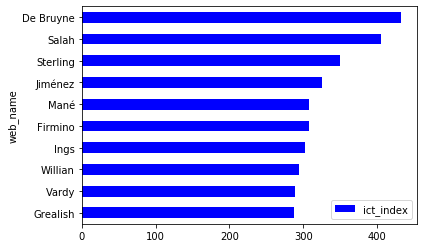

In [6]:
top_10_ict.sort_values('ict_index', inplace=True, ascending=True) # sort on ict_index for display below
top_10_ict.plot(kind='barh',x='web_name',y='ict_index',color='blue')
plt.show()

It's interesting to see Firmino in this list since, from part 1, we saw that he was expected to score 7 more goals for Liverpool. However, this still does not mean that Firmino is a great FPL pick. Again, his style of play is different and that quality could be shown from his impact on the field and not necessarily from volumes of goals and assists. He can still be a fantastic striker who does not score often. Additionally with his high price, he is still not a great FPL player to own.

I've been trying to decide between Jimenez and Ings since they have the same price (8.5) and have very similar explicit stats (value, total points, pp90, etc). Their ICT index values are also relatively close, but Jimenez does edge ahead. There is one important statistc from the implicit analysis part 1 that could provide the final decision: (goals-xG). From part 1, it was stated that he scored 6 more goals than expected, and I believe that luck played a big part in that. Sure, he showed that he is tenacious and pounces on every opportunity he gets, but take a look at his goals from the season: https://www.youtube.com/watch?v=wUThJVacnIA. There are around 5-6 terrible goalkeeper or defender mistakes that Ings takes full advantage of, but will he get these lucky opportunites in the future? Jimenez has a (goal-xG) stat close to 0 and also should have had one more assist from his (assist-xA) stat. In the 2018-2019 season, Jimenez also had a (goal-xG) stat close to -1 and a (assist-xA) stat close to 0 which means he converted his chances and his teammates scored when he created. From an objective point of view, Jimenez is a safer and more reliable pick to go with.

It's interesting to see the relationship between the ICT score and the total points of a player. Surely there is a positive relationship between the two – the higher the ICT score, the more total points a player gets. Since the ICT index can be broken up to 3 categories, it is useful to see which specific metric out of influence, creativity, or threat has the strongest positive relationship.

<Figure size 1440x720 with 0 Axes>

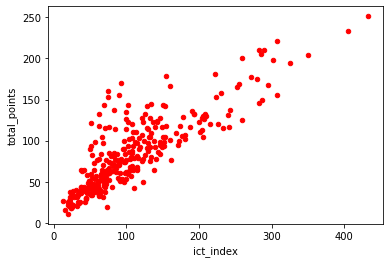

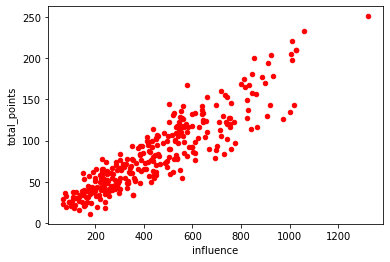

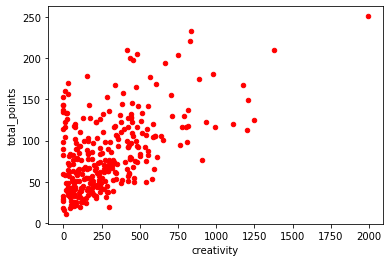

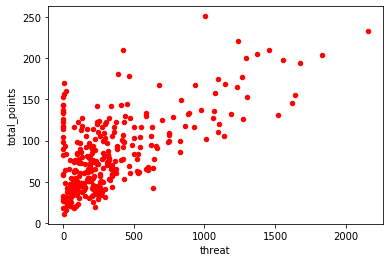

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure(figsize = (20,10))
df_key_stats.plot(kind='scatter',x='ict_index',y='total_points',color='red')
plt.show()

df_key_stats.plot(kind='scatter',x='influence',y='total_points',color='red')
plt.show()

df_key_stats.plot(kind='scatter',x='creativity',y='total_points',color='red')
plt.show()

df_key_stats.plot(kind='scatter',x='threat',y='total_points',color='red')
plt.show()

plt.subplots_adjust(hspace = 0.7,wspace = 0.25)
plt.show()

At first it appears that influence is the 'best' index since it looks like a strong linear relationship (like y = x). Influence vs Total Points does show a strong linear relationship, but this is because goalkeepers and defenders have some sort of defensive influence on the pitch whereas goalkeepers and most defenders don't usually have creativity or threat on goal. This can be seen by the vertical line around threat = 0 or creativity = 0 since goalkeepers who are great have a lot of points but offer no threat or creativity to score or assist goals.

It does seem that these statstics have a positive relationship with total points, so we now look at the top 10 players in each category.

In [8]:
df_key_stats.sort_values('influence', inplace=True, ascending=False) # sort on influence
top_10_i = df_key_stats.head(10)
top_10_i

,web_name,team,ict_index,influence,creativity,threat,selected_by_percent,goals_scored,assists,now_cost,minutes,total_points,value
275,De Bruyne,Man City,432.1,1322.2,1990.8,1005.0,38.3,13,23,11.5,2790,251,21.83
257,Salah,Liverpool,405.1,1061.2,834.8,2156.0,33.2,19,10,12.0,2879,233,19.42
262,Alexander-Arnold,Liverpool,282.8,1026.8,1380.3,420.0,56.4,4,15,7.5,3173,210,28.00
205,Vardy,Leicester,288.8,1026.0,418.4,1455.0,15.9,23,7,10.0,3032,210,21.00
329,Dubravka,Newcastle,102.0,1019.0,0.0,0.0,3.3,0,0,5.0,3420,143,28.60
254,Mané,Liverpool,307.7,1010.2,826.6,1239.0,12.1,18,10,12.0,2745,221,18.42
375,Ings,Southampton,302.4,1010.0,458.3,1558.0,25.6,22,2,8.5,2800,198,23.29
3,Aubameyang,Arsenal,285.2,1006.0,479.6,1369.0,35.5,22,5,12.0,3136,205,17.08
70,Ryan,Brighton,100.1,1000.0,0.0,0.0,22.9,0,0,4.5,3420,135,30.00
369,Ramsdale,Sheffield Utd,99.7,973.8,24.0,0.0,6.7,0,1,5.0,3330,126,25.20


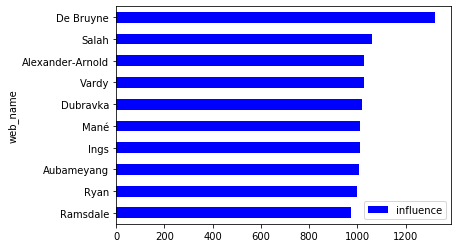

In [9]:
top_10_i.sort_values('influence', inplace=True, ascending=True) # sort on influence for display below
top_10_i.plot(kind='barh',x='web_name',y='influence',color='blue')
plt.show()

Influence does factor in defender's contributions that affect the outcome of matches which is why you see players like Dubravka, Ryan, and Ramsdale. Dubravka owners would be happy to see that he has more influence than players like Mane, Ings, and Aubameyang. He is already a very good pick from the explicit analysis and has good value. The same goes with Ryan. Ramsdale also might be a decent pick because he will return to Sheffield United who have a much better defense than Newcastle and Brighton.

In [10]:
df_key_stats.sort_values('creativity', inplace=True, ascending=False) # sort on creativity
top_10_c = df_key_stats.head(10)
top_10_c

,web_name,team,ict_index,influence,creativity,threat,selected_by_percent,goals_scored,assists,now_cost,minutes,total_points,value
275,De Bruyne,Man City,432.1,1322.2,1990.8,1005.0,38.3,13,23,11.5,2790,251,21.83
262,Alexander-Arnold,Liverpool,282.8,1026.8,1380.3,420.0,56.4,4,15,7.5,3173,210,28.00
212,Maddison,Leicester,259.2,642.4,1246.4,702.0,10.2,6,5,7.0,2624,125,17.86
37,Grealish,Aston Villa,287.0,826.6,1209.2,837.0,11.6,8,7,7.0,3233,149,21.29
466,Moutinho,Wolves,204.0,712.0,1200.1,122.0,2.7,1,7,5.5,3105,113,20.55
27,Willian,Arsenal,294.6,834.8,1177.7,930.0,8.7,9,9,8.0,2595,168,21.00
158,Digne,Everton,215.0,743.0,1112.0,293.0,6.6,0,8,6.0,3031,120,20.00
379,Ward-Prowse,Southampton,240.7,864.6,989.9,548.0,3.5,5,4,6.0,3420,117,19.50
258,Robertson,Liverpool,221.7,845.8,980.2,389.0,11.5,2,12,7.0,3111,181,25.86
100,McNeil,Burnley,200.6,644.2,931.4,430.0,1.3,2,7,6.0,3339,123,20.50


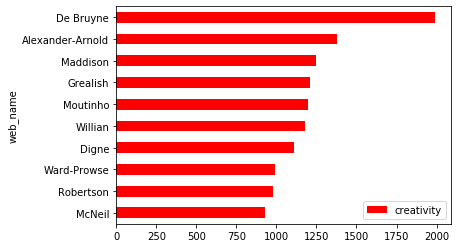

In [11]:
top_10_c.sort_values('creativity', inplace=True, ascending=True) # sort on creativity for display below
top_10_c.plot(kind='barh',x='web_name',y='creativity',color='red')
plt.show()

Maddison is a another player to discuss. He was a great player to pick when Leicester was performing well during the first half of the season. Now, it is hard to tell if Leicester will improve from their poor performances in the second half. Since there is too much uncertainty, for now he is a player to avoid.

Aston Villa has been a poor team and have barely avoided relegation, and without the main man, Jack Grealish, who knows if Aston Villa would still be in the Premier League. He creates 24.1% of the total team chances, the second highest percentage, and the second highest key passes (92) behind Kevin De Bruyne. Grealish is a player that has popped up in a couple of top 10 tables in the previous analyses, and he has done the same here. Currently he is selected in my FPL team, and he looks to stay.

In [12]:
df_key_stats.sort_values('threat', inplace=True, ascending=False) # sort on threat
top_10_t = df_key_stats.head(10)
top_10_t

,web_name,team,ict_index,influence,creativity,threat,selected_by_percent,goals_scored,assists,now_cost,minutes,total_points,value
257,Salah,Liverpool,405.1,1061.2,834.8,2156.0,33.2,19,10,12.0,2879,233,19.42
279,Sterling,Man City,350.2,921.6,751.3,1829.0,4.9,20,6,11.5,2651,204,17.74
472,Jiménez,Wolves,325.4,911.6,668.2,1680.0,21.7,17,7,8.5,3241,194,22.82
252,Firmino,Liverpool,307.5,733.6,703.0,1638.0,3.6,9,9,9.5,2985,155,16.32
285,Jesus,Man City,282.1,757.6,447.7,1620.0,2.4,14,8,9.5,2018,146,15.37
375,Ings,Southampton,302.4,1010.0,458.3,1558.0,25.6,22,2,8.5,2800,198,23.29
68,Maupay,Brighton,240.5,518.6,369.2,1519.0,2.6,10,3,6.5,2763,131,20.15
205,Vardy,Leicester,288.8,1026.0,418.4,1455.0,15.9,23,7,10.0,3032,210,21.00
3,Aubameyang,Arsenal,285.2,1006.0,479.6,1369.0,35.5,22,5,12.0,3136,205,17.08
118,Abraham,Chelsea,223.3,659.6,283.2,1301.0,7.3,15,6,7.5,2206,153,20.40


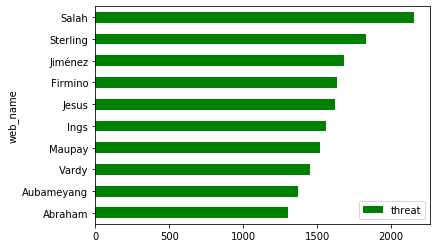

In [13]:
top_10_t.sort_values('threat', inplace=True, ascending=True) # sort on threat for display below
top_10_t.plot(kind='barh',x='web_name',y='threat',color='green')
plt.show()

Again, we see Firmino and Jesus both have a lot of threat in front of goal since this metric is determined by their likeliness of scoring which is basically expected goal (xG) in implicit analysis part 1. Sterling is also a great pick from all his implicit statistics and goals, but because of his expensive price and low value he is hard to squeeze in. He is the same price as De Bruyne, and that is all I'm going to say.

One last implicit statistic that is a bit different is seeing what other users are selecting. This is more to pick out the differential players, the players who you know have quality but others don't pick them. This can provide an advantage in points and therefore a higher ranking. It isn't purely related to the soccer players, but it's quite important to observe the behavorial side of the game. It's similar to when you're trying to understand how people think in the stock market to buy or sell a stock (behavorial finance).

In [14]:
df_key_stats.sort_values('selected_by_percent', inplace=True, ascending=False) # sort on selected_by_percent
top_20_selected = df_key_stats.head(20)
top_20_selected.head(10) # showing the top 10 of the top 20 data set

,web_name,team,ict_index,influence,creativity,threat,selected_by_percent,goals_scored,assists,now_cost,minutes,total_points,value
262,Alexander-Arnold,Liverpool,282.8,1026.8,1380.3,420.0,56.4,4,15,7.5,3173,210,28.00
275,De Bruyne,Man City,432.1,1322.2,1990.8,1005.0,38.3,13,23,11.5,2790,251,21.83
3,Aubameyang,Arsenal,285.2,1006.0,479.6,1369.0,35.5,22,5,12.0,3136,205,17.08
257,Salah,Liverpool,405.1,1061.2,834.8,2156.0,33.2,19,10,12.0,2879,233,19.42
305,Fernandes,Man Utd,139.2,551.8,479.3,361.0,26.8,8,8,10.5,1187,117,11.14
375,Ings,Southampton,302.4,1010.0,458.3,1558.0,25.6,22,2,8.5,2800,198,23.29
400,Son,Spurs,254.6,800.6,606.1,1144.0,24.6,11,13,9.0,2478,169,18.78
96,Pope,Burnley,93.1,900.0,30.3,2.0,24.0,0,0,5.5,3420,170,30.91
253,van Dijk,Liverpool,154.8,930.2,152.4,467.0,23.6,5,2,6.5,3420,178,27.38
469,Doherty,Wolves,160.0,576.2,340.5,681.0,23.1,4,8,6.0,2836,167,27.83


<Figure size 720x1440 with 0 Axes>

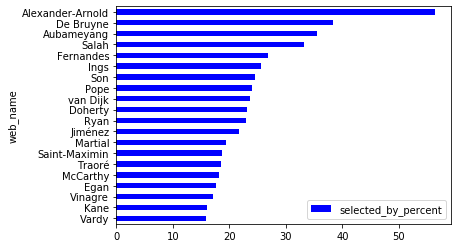

In [16]:
top_20_selected.sort_values('selected_by_percent', inplace=True, ascending=True) # sort on selected_by_percent to display below
plt.figure(figsize= (10,20))
top_20_selected.plot(kind = 'barh',x = 'web_name',y ='selected_by_percent', color = 'blue') # sort on percentage selected 
plt.show()

This are the top 20 players who have been selected by users on FPL who are represented from highest to lowest owned. It is surprising to see that Aubameyang is the 3rd highest player owned, although he looks to be the best Arsenal player to own. 

Funnily enough, I am an Arsenal fan but have not talked much about Arsenal because I think Arsenal players are too overpriced in FPL. Aubameyang is definitely an amazing player and will probably have another great season (if he stays), but FPL-wise the funds invested in him would be much better off going to other players like Salah or Sterling. 

With all that said, here are my suggestions for the revised top 3 players to select in each position:

For goalkeepers,
1. Dubravka
2. Pope
3. Ryan

For midfielders,
1. De Bruyne
2. Salah
3. Sterling

For forwards,
1. Jimenez
2. Martial
3. Ings

The team selection will be updated, but it could be changed after making the final analysis, which will be posted soon.